In [2]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
datasets=load_dataset('lukebarousse/data_jobs')
df=datasets['train'].to_pandas()


# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list:ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

c:\Users\shabi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df_da_us=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_da_us=df_da_us.dropna(subset=['salary_year_avg'])
df_da_us_exploded=df_da_us.explode('job_skills')
df_da_us_exploded[['salary_year_avg','job_skills']].head()


,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [9]:
df_da_skills=df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_da_skills=df_da_skills.rename(columns={'count':'skill_count','median':'median_salary'})
df_da_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [11]:
df_da_job_count=len(df_da_us)
df_da_skills['skill_percent']=df_da_skills['skill_count']/df_da_job_count*100
skill_percent=5
df_da_skills_high_demand=df_da_skills[df_da_skills['skill_percent']>=skill_percent]
df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


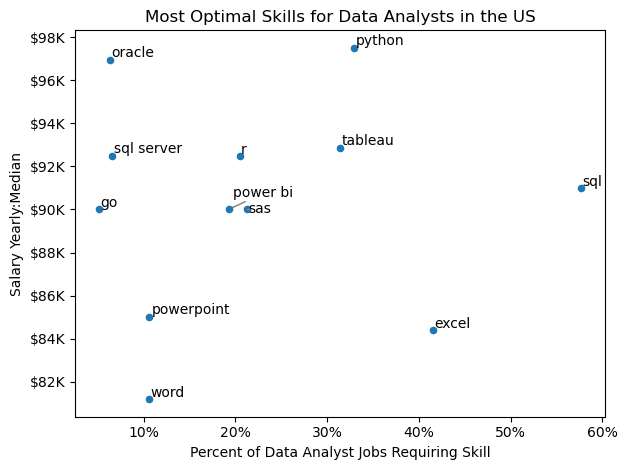

In [29]:
from adjustText import adjust_text
df_da_skills_high_demand.plot(kind='scatter',x='skill_percent',y='median_salary')
plt.xlabel('Percent of Data Analyst Jobs Requiring Skill')
plt.ylabel('Salary Yearly:Median')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
from matplotlib.ticker import PercentFormatter

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter())
texts=[]
for i,txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i],df_da_skills_high_demand['median_salary'].iloc[i],txt))
    
adjust_text(texts,arrowprops=dict(arrowstyle='->',color='gray',lw=1))
plt.show()

In [17]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['excel',
  'looker',
  'ssrs',
  'sheets',
  'qlik',
  'cognos',
  'word',
  'power bi',
  'sharepoint',
  'sap',
  'spreadsheet',
  'powerpoint',
  'powerbi',
  'dax',
  'msaccess',
  'sas',
  'esquisse',
  'ms access',
  'visio',
  'tableau',
  'alteryx',
  'ssis',
  'nuix',
  'spss',
  'microstrategy',
  'splunk',
  'datarobot',
  'outlook'],
 'programming': ['c++',
  'vba',
  't-sql',
  'pascal',
  'objective-c',
  'no-sql',
  'golang',
  'ruby',
  'java',
  'bash',
  'delphi',
  'f#',
  'solidity',
  'perl',
  'visual basic',
  'julia',
  'swift',
  'crystal',
  'lua',
  'sql',
  'groovy',
  'r',
  'fortran',
  'php',
  'haskell',
  'elixir',
  'html',
  'css',
  'powershell',
  'assembly',
  'ocaml',
  'rust',
  'cobol',
  'apl',
  'erlang',
  'javascript',
  'sass',
  'python',
  'dart',
  'c',
  'vb.net',
  'scala',
  'sas',
  'kotlin',
  'lisp',
  'nosql',
  'c#',
  'go',
  'matlab',
  'mongodb',
  'clojure',
  'shell',
  'visualbasic',
  'typescript',
  'mo

In [20]:
df_technology=pd.DataFrame(list(technology_dict.items()), columns=['Technology', 'Skills'])
df_technology=df_technology.explode('Skills')
df_technology

,Technology,Skills
0,analyst_tools,excel
0,analyst_tools,looker
0,analyst_tools,ssrs
0,analyst_tools,sheets
0,analyst_tools,qlik
...,...,...
9,sync,slack
9,sync,twilio
9,sync,google chat
9,sync,rocketchat


In [35]:
df_plot=df_da_skills_high_demand.merge(df_technology,left_on='job_skills',right_on='Skills')
df_plot


,skill_count,median_salary,skill_percent,Technology,Skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


4 [0.41084032 0.99872769]
5 [0.7436631  0.40046977]


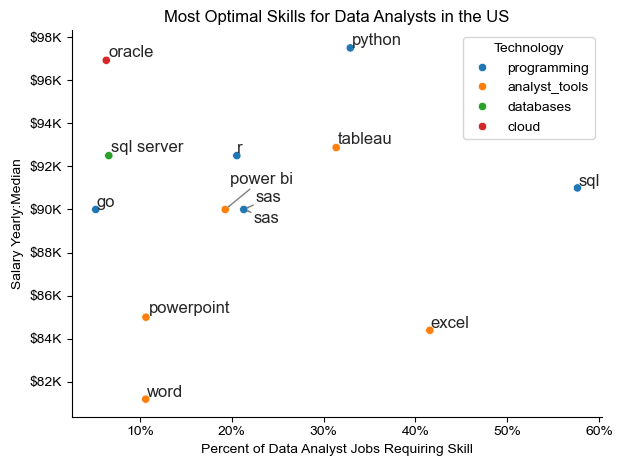

In [38]:
from adjustText import adjust_text
#df_plot.plot(kind='scatter',x='skill_percent',y='median_salary')
sns.scatterplot(data=df_plot,x='skill_percent',y='median_salary',hue='Technology')
plt.xlabel('Percent of Data Analyst Jobs Requiring Skill')
plt.ylabel('Salary Yearly:Median')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
from matplotlib.ticker import PercentFormatter
sns.despine()
sns.set_theme(style='ticks')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter())
texts=[]
for i, row in df_plot.iterrows():
    texts.append(plt.text(row['skill_percent'], row['median_salary'], row['Skills']))

adjust_text(texts,arrowprops=dict(arrowstyle='->',color='gray',lw=1))
plt.show()